# Lab 3 - Prior and Posterior predictive distributions

In [13]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt

## Modeling prior predictive distribution

### Create and generate a Stan model

In [14]:
model_1 = CmdStanModel(stan_file='model_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


### Generate 1000 samples (pair of p an y)

In [24]:
samples_1 = model_1.sample(fixed_param=True, iter_sampling=1000)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


### Compute ratio of allergic reactions for each sample and create a histogram.

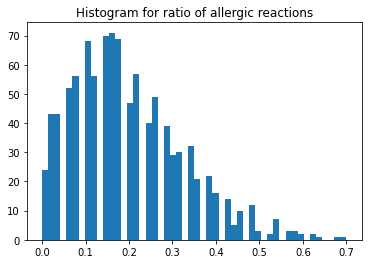

In [25]:
# compute the ratio of allergic reactions for each sample
ratio = np.array(samples_1.stan_variables()['y']) / 50

# plot a histogram of the ratio samples
plt.hist(ratio, bins=50)
plt.title("Histogram for ratio of allergic reactions")
plt.show()

### Verify if mean of the ratio is consistent with prior knowledge

In [17]:
print(f' Mean of the ratio is: {np.mean(ratio)}')

 Mean of the ratio is: 0.20232000000000003


Mean of the ratio is about 20%, so it's consistent with prior knowledge because of using following parameters in beta distribution:
- $\alpha = 2$
- $\beta = 8$ 

## Modeling posterior and posterior predictive distribution

### Create and generate a Stan model

In [26]:
model_2 = CmdStanModel(stan_file='model_2.stan')

INFO:cmdstanpy:compiling stan file /root/PCH_lab2/PCH_lab3/model_2.stan to exe file /root/PCH_lab2/PCH_lab3/model_2
INFO:cmdstanpy:compiled model executable: /root/PCH_lab2/PCH_lab3/model_2


In [28]:
# Data
data = {'N': 50, 'y': 10}

# Generate samples
samples_2 = model_2.sample(data=data)
model_2_df = samples_2.draws_pd()
model_2_df.describe()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000
mean,-30.504127,0.915875,1.006813,1.379250,2.432500,0.0,30.990610,0.200973,10.078000
std,0.660774,0.126268,0.127158,0.485261,1.160724,0.0,0.943685,0.049950,3.728859
min,-35.416300,0.050880,0.851338,1.000000,1.000000,0.0,30.024400,0.069819,0.000000
25%,-30.667325,0.880277,0.897003,1.000000,1.000000,0.0,30.297075,0.164950,7.000000
50%,-30.244150,0.970784,1.016172,1.000000,3.000000,0.0,30.695000,0.198498,10.000000
75%,-30.071700,1.000000,1.125983,2.000000,3.000000,0.0,31.403350,0.232803,12.000000
max,-30.024100,1.000000,1.143570,2.000000,7.000000,0.0,36.941000,0.385363,24.000000


### Compute ratio of predicted allergic reactions for each sample and create a histogram.

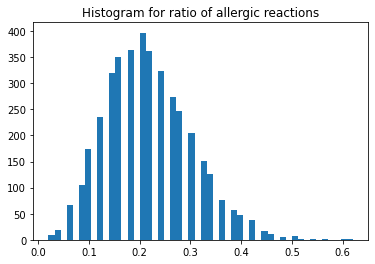

In [20]:
y_pred = model_2_df['y_pred']

# compute the ratio of allergic reactions for each sample
ratio = y_pred / 50

# plot a histogram of the ratio samples
plt.hist(ratio, bins=50)
plt.title("Histogram for ratio of allergic reactions")
plt.show()

In [21]:
# Compute posterior summaries for p and y_pred
az.summary(samples_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.108,0.029,0.057,0.163,0.001,0.001,1597.0,1582.0,1.0
y_pred,10.792,4.265,3.000,18.000,0.089,0.063,2265.0,2592.0,1.0


In [22]:
az.summary(samples_2, hdi_prob=0.94)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.108,0.029,0.057,0.163,0.001,0.001,1597.0,1582.0,1.0
y_pred,10.792,4.265,3.000,18.000,0.089,0.063,2265.0,2592.0,1.0


### Compute the probability that ratio is lower than the average probability from traditional vaccines (count the number of simulated ratios that are smaller).

In [23]:
p_traditional = 0.2  # 20% allergic reaction rate for traditional vaccines
prob_lower = (y_pred < p_traditional).mean()
prob_lower

0.0